# Simple creation of workspace inputs

In [1]:
!pip install lmfit

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Valerio Ippolito - INFN Sezione di Roma

import ROOT
import uuid
import os

Welcome to JupyROOT 6.24/06


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
raw_data = [ # from CMS
1.5945261367020767, 6.774581912586716, 
1.6113832877189376, 10.213080082305199, 
1.6339324593685813, 5.1036151013312505, 
1.665323385057881, 4.924071183320089, 
1.7075336532780474, 3.8402374332849734, 
1.7392384268596137, 3.785551073806536, 
1.7799431736026268, 3.1117731612435624, 
1.8142986311413785, 2.685186358449631, 
1.8539372245964403, 2.509333416072097, 
1.8961450318794015, 2.031380443756917, 
1.9369104524922722, 1.907040381245437, 
1.9824155432493917, 1.5414417521040236, 
2.023674370435357, 1.463858920944078, 
2.0724852771965625, 1.1502223853112163, 
2.1123493508827607, 1.1493967479045208, 
2.1553973140518945, 0.8513655176572652, 
2.1941826390848136, 0.8547886669726017, 
2.245534798312993, 0.7154528434427602, 
2.28511281368391, 0.6107501518859475, 
2.3338139754771583, 0.5626987400539565, 
2.3825680532547304, 0.4488193886514791, 
2.4348628380409347, 0.4170943727974063, 
2.492605819513943, 0.3472086131039164, 
2.5441714723894764, 0.3089564766092995, 
2.6057416235929782, 0.26431047118219964, 
2.658796967243513, 0.22752006815845957, 
2.718485796368768, 0.20497602785330604, 
2.7767321523719954, 0.17772344947814334, 
2.84049068178971, 0.1579233670048748, 
2.9031274781434804, 0.13110981905365462, 
2.968466588115957, 0.11665288430847782, 
3.0352762498723758, 0.0964942860725476, 
3.1022083407113086, 0.08666790124674673, 
3.1748532960450566, 0.06679458446141086, 
3.2419757149049917, 0.05960805098929722, 
3.3193708780838884, 0.04733931345795827, 
3.384648558065975, 0.042054443998819954, 
3.470466821253414, 0.0325867462696713, 
3.542261922596676, 0.028715193222693284, 
3.6268257699633724, 0.022499012084975283, 
3.7076274678659287, 0.0184797993102029, 
3.7932674741824677, 0.016136915913417763, 
3.871687468002966, 0.012805461837378487, 
3.9616052999594866, 0.010784329588491688, 
4.047767055116135, 0.007945373019512939, 
4.130067439735637, 0.006387741892713237, 
4.2297934287439505, 0.005062565190158038, 
4.302189419753594, 0.00510452100582867, 
4.386489789422147, 0.003078112730891864, 
4.463864673926383, 0.0030391655334750336, 
4.56807803974072, 0.0016766774694046283, 
4.650053009615509, 0.0017257155377280306, 
4.766841659181161, 0.0019566033313030366, 
4.843791662724673, 0.001999278737749049, 
4.9263580571354835, 0.000651360119404615, 
5.013809700474777, 0.0006478291752452424, 
5.1179882495209785, 0.0004816412836281495, 
5.21244109226914, 0.0004705275617889206, 
5.343399026808922, 0.00047252898841463416, 
5.42965626030763, 0.0004755471019663482, 
5.522209196420389, 0.00024331397786600718, 
5.584700666785488, 0.00017385163195635187, 
5.623992189739429, 0.0002626314400233126, 
5.737178669728404, 0.00013751242694707354, 
5.845764891463685, 0.00014698868148602698, 
5.8874763068942215, 0.00012718221045244306, 
6.005453011312794, 0.00014856908839241815, 
5.990291894352173, 0.00009477763627720359, 
6.093159125067489, 0.00016340828662853225, 
6.177742334289245, 0.000029904594237265562, 
6.23723175944406, 0.00003942202209980606, 
6.288171627290685, 0.000029044959718191262, 
6.640368345884062, 0.0000537410644789059, 
6.7249231384815475, 0.0000414233384576809, 
6.7571464365103715, 0.00005783656254366704, 
6.857554873343088, 0.00003470861141442978, 
8.011328074455147, 0.00004980660854317575, 
8.125024110193316, 0.00004874255908575144, 
]

In [5]:
data = np.array(raw_data).reshape(-1, 2)
data[:, 0] = np.arange(1.59, 1.59+0.1 * data.shape[0], 0.1)

In [6]:
from lmfit import Model
# https://cds.cern.ch/record/2803669/files/EXO-21-010-pas.pdf sec. 7, page 17

def bkg_model(x, p0, p1, p2, p3, p4):
    s = x / 13. # x / sqrt(s)
    return p0 * np.power(1-np.power(s, 1/3.), p1) / np.power(s, p2 + p3 * np.log(x) + p4 * np.power(np.log(x), 2))

def bkg_syst1(x, p0, p1, p2, p3, p4):
    s = x / 13. # x / sqrt(s)
    return p0 * np.power(1-s, p1) / np.power(s, p2 + p3 * np.log(x) + p4 * np.power(np.log(x), 2))

def bkg_syst2(x, p0, p1, p2, p3, p4):
    s = x / 13. # x / sqrt(s)
    return p0 * np.exp(-p1* s -p2*np.power(x, 2) - p3 * np.power(x, 3)) / np.power(s, p4)

bmodel = Model(bkg_model)
print(f'parameter names: {bmodel.param_names}')
print(f'independent variables: {bmodel.independent_vars}')


parameter names: ['p0', 'p1', 'p2', 'p3', 'p4']
independent variables: ['x']


In [7]:
yfit = data[:,1]#[data[:,0] > 5]
xfit = data[:,0]#[data[:,0] > 5]
#params = bmodel.guess(yfit, x=xfit)
bmodel.set_param_hint('p0', min=0.)
bmodel.set_param_hint('p1', min=0.)
bmodel.set_param_hint('p2', min=0.)
bmodel.set_param_hint('p3', min=0.5)
bmodel.set_param_hint('p4', min=2)
params = bmodel.make_params(p0=6e-8, p1=1, p2=8, p3=1.5, p4=2)
res = bmodel.fit(yfit, params, x=xfit) # this may fail before the plot - investigate the binning then...
print(res.fit_report())

[[Model]]
    Model(bkg_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 143
    # data points      = 78
    # variables        = 5
    chi-square         = 13.9866100
    reduced chi-square = 0.19159740
    Akaike info crit   = -124.051454
    Bayesian info crit = -112.267910
##  Warning: uncertainties could not be estimated:
    p0:  at boundary
    p4:  at initial value
    p4:  at boundary
[[Variables]]
    p0:  9.7230e-09 (init = 6e-08)
    p1:  0.70816201 (init = 1)
    p2:  8.83090495 (init = 8)
    p3:  1.64098121 (init = 1.5)
    p4:  2.00000000 (init = 2)


In [8]:
def signal(x, A, mass, reso):
    z = (x-mass)/reso
    return A / (np.sqrt(2 * np.pi) * reso) * np.exp(-np.power(z, 2)/2.)

(1e-08, 10.0)

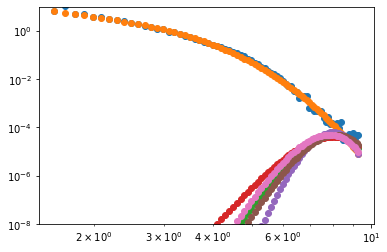

In [9]:
plt.scatter(data[:,0], data[:,1])
plt.scatter(data[:,0], bmodel.eval(params, x=data[:,0]))
plt.scatter(data[:,0], signal(x=data[:,0], A=0.0001, mass=8, reso=0.1*8), label='signal')
plt.scatter(data[:,0], signal(x=data[:,0], A=0.0001, mass=8, reso=0.12*8), label='+1$\sigma$ reso')
plt.scatter(data[:,0], signal(x=data[:,0], A=0.0001, mass=8, reso=0.08*8), label='-1$\sigma$ reso')
plt.scatter(data[:,0], signal(x=data[:,0], A=0.0001, mass=8*1.02, reso=0.1*8), label='+1$\sigma$ scale')
plt.scatter(data[:,0], signal(x=data[:,0], A=0.0001, mass=8*0.98, reso=0.1*8), label='+1$\sigma$ scale')
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-8,1e1)

Let's define a couple of common-sense functions to deal with histograms

In [3]:
def printHisto(original):
  for i in xrange(0, original.GetNbinsX()+2):
    print (i, original.GetXaxis().GetBinLowEdge(i), original.GetBinContent(i))

def getTruncatedHisto(original, start, end, single_bin=False):
  # store pre-edit info
  n_bins_old = original.GetNbinsX()

  # determine new histogram edges
  first_bin = original.GetXaxis().FindBin(start)
  first_x = original.GetXaxis().GetBinLowEdge(first_bin)
  last_bin = original.GetXaxis().FindBin(end)
  last_x = min(original.GetXaxis().GetBinUpEdge(n_bins_old + 1), original.GetXaxis().GetBinUpEdge(last_bin))

  if not single_bin:
    # simply truncate the original histogram
    n_bins_new = last_bin - first_bin + 1
  else:
    # integrate the original histogram from first_x to last_x
    n_bins_new = 1


  # create the new histogram
  result = ROOT.TH1F('%s_trunc' % original.GetName(),
                     '%s_trunc' % original.GetTitle(),
                     n_bins_new,
                     first_x,
                     last_x)

  errorVal = ROOT.Double(0)

  # underflow
  result.SetBinContent(0, original.IntegralAndError(0, first_bin - 1, errorVal))
  result.SetBinError(0, errorVal)

  # bulk
  if not single_bin:
    for i in xrange(1, n_bins_new + 1):
      result.SetBinContent(i, original.GetBinContent(first_bin + i - 1))
      result.SetBinError(i, original.GetBinError(first_bin + i - 1))
  else:
    result.SetBinContent(1, original.IntegralAndError(first_bin, last_bin, errorVal))
    result.SetBinError(1, errorVal)

  # overflow
  result.SetBinContent(n_bins_new + 1, original.IntegralAndError(last_bin + 1, n_bins_old + 1, errorVal))
  result.SetBinError(n_bins_new + 1, errorVal)

  return result

In [ ]:

  histonamemap = {
    'data' : 'hNe',
    'bkg'  : 'hNeSum_1_2_3',
    'sig'  : 'hPDF_DM3%d' % imass,
  }
  histocolormap = {
    'data' : ROOT.kBlack,
    'bkg'  : ROOT.kBlue+1,
    'sig'  : ROOT.kRed,
  }
  scale_factors = {
    'bkg' : exposure,
    'sig' : exposure,
  }
  input_file = 'Histo_for_Marco.root'
  output_file = 'histos_%d' % mass[imass]
  rebin = None
  save_plot = False
  plotfile = 'plots/spectrum_%s.png' % massstr

  getHistograms(input_file=input_file, histonamemap=histonamemap, output_file=output_file, rebin=rebin, save_plot=save_plot)


    # create measurement
    meas = ROOT.RooStats.HistFactory.Measurement('DS_%s' % mass, 'DS_%s' % mass)
    meas.SetOutputFilePrefix('./ws/example_DS_%s' % mass)
    meas.SetPOI('mu')
    meas.AddConstantParam('Lumi')
    meas.SetLumi(1.0)
    meas.SetLumiRelErr(0.0)
    meas.SetExportOnly(True)

    # create channel
    chan = ROOT.RooStats.HistFactory.Channel('S2only')
    chan.SetData('data', histo_filename)
    chan.SetStatErrorConfig(0.05, 'Poisson')

    # create signal
    signal = ROOT.RooStats.HistFactory.Sample('sig', 'sig', histo_filename)
    signal.SetNormalizeByTheory(False)
    for sysname, sysvalue in norm_sys['sig']: 
      signal.AddOverallSys(sysname, 1.0 - sysvalue, 1.0 + sysvalue)
    signal.AddNormFactor('mu', 0, 0, 20)
    signal.GetStatError().Activate(False)
    #meas.AddConstantParam('yield_Signal')
    chan.AddSample(signal)

    # create background
    background = ROOT.RooStats.HistFactory.Sample('bkg', 'bkg', histo_filename)
    background.SetNormalizeByTheory(False)
    if freeBkg: background.AddNormFactor('mu_bkg', 1, 0, 20)
    for sysname, sysvalue in norm_sys['bkg']: 
      background.AddOverallSys(sysname, 1.0 - sysvalue, 1.0 + sysvalue)
    background.GetStatError().Activate(False)
    #meas.AddConstantParam('yield_Signal')
    chan.AddSample(background)

    # add channel to measurement
    meas.AddChannel(chan)
    meas.CollectHistograms()
    meas.PrintTree()
    meas.PrintXML('xml', meas.GetOutputFilePrefix())

    ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

  finally:
    
    pass
    #os.remove(filename) ## to be used if using str(uuid.uuid4()) as filename

In [ ]:
if __name__ == '__main__':

In [ ]:
norm_sys = {
    'sig' : [],
    'bkg' : [ ('unc', 0.15) ],
  }

  if options.run == 'run1':
    start = 4
    end = 20
    single_bin = False
    freeBkg = False
    rebin = False
  
  signals = [
    0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1, 1.025,
    1.05, 1.075, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45,
    1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3., 3.25, 3.5, 3.75,
    4.0, 4.25, 4.5, 4.75, 5., 5.5, 6.0, 6.5, 7., 7.5,
    8.0, 8.5, 9., 9.5, 10.0, 10.75, 12.5, 15., 17.5, 20.,
  ]

  for signal_number, mass_raw in enumerate(signals):
    # use correct histogram names for this signal hypothesis
    hname = {
      'data' : 'hNe',
      'sig' : ('hPDF_DM3%d' % signal_number),
      'bkg' : 'hNeSum_1_2_3',
    }

    mass = (('%06.3f' % mass_raw).replace('.', 'p'))

    process(hname=hname, norm_factor=norm_factor, norm_sys=norm_sys, start=start, end=end, rootfile=rootfile, signal_number=signal_number, mass=mass, single_bin=single_bin, freeBkg=freeBkg, rebin=rebin)